In [5]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
%matplotlib inline

In [20]:
import os

from datetime import datetime

import pandas_datareader.data as web

start_time = datetime(2007, 1, 1)
end_time = datetime(2017, 1, 1)

BAC = web.DataReader("BAC", 
                     "av-daily",
                    start = start_time,
                    end = end_time,
                    api_key='3OTZ781DUI3KSWHQ')

BAC.head()

,open,high,low,close,volume
2007-01-03,53.40,54.18,52.99,53.33,16028200
2007-01-04,53.33,53.89,53.05,53.67,13175000
2007-01-05,53.59,53.59,53.03,53.24,10205000
2007-01-08,53.46,53.64,52.80,53.45,9685900
2007-01-09,53.60,53.71,52.97,53.50,12546500


In [22]:
tickers= ['BAC','C','GS','JPM','MS','WFC']

In [23]:
import time
ticker_dict={}

for ticker in tickers[:3]:
    ticker_dict[ticker] = web.DataReader(name = ticker, 
                    data_source = "av-daily", 
                    start = start_time,
                    end = end_time,
                    api_key = '3OTZ781DUI3KSWHQ')
    
time.sleep(60)

for ticker in tickers[3:]:
    ticker_dict[ticker]= web.DataReader(name = ticker, 
                    data_source = "av-daily", 
                    start = start_time,
                    end = end_time,
                    api_key = '3OTZ781DUI3KSWHQ')

In [25]:
tickerdataframes = []
for item in ticker_dict:
    tickerdataframes.append(ticker_dict[item])

In [30]:
bank_stocks = pd.concat(tickerdataframes, 
                        axis=1, 
                        keys=tickers)

bank_stocks.columns.names = ['Bank Ticker',
                             'Stock Info']

In [31]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    open   high    low  close    volume   open   high    low  close   
2007-01-03   53.40  54.18  52.99  53.33  16028200  55.95  56.28  54.72  55.25   
2007-01-04   53.33  53.89  53.05  53.67  13175000  54.90  56.15  54.72  55.06   
2007-01-05   53.59  53.59  53.03  53.24  10205000  54.60  55.05  54.46  54.77   
2007-01-08   53.46  53.64  52.80  53.45   9685900  54.60  55.15  54.30  55.05   
2007-01-09   53.60  53.71  52.97  53.50  12546500  54.84  55.15  54.19  54.57   

Bank Ticker            ...     MS                                  WFC         \
Stock Info     volume  ...   open   high    low  close   volume   open   high   
2007-01-03   22821000  ...  81.93  82.32  80.82  81.62  4816100  35.48  36.01   
2007-01-04   16586000  ...  81.27  82.40  80.50  81.91  5036400  35.74  36.02   
2007-01-05   13178000  ...  81.35  81.59  80.36  80.86  4674300  35.79  35.83   
2007-01-08   12369000  ...  80.61  81.62  80.04  81.35  4852800  35.79  35.89   
2007-01-09   19630000  ...  81.20  81.85  80.72  80.89  5039500  35.58  35.85   

Bank Ticker                          
Stock Info     low  close    volume  
2007-01-03   35.37  35.74  12447600  
2007-01-04   35.54  35.80  11060500  
2007-01-05   35.51  35.60  10329200  
2007-01-08   35.39  35.50  11650400  
2007-01-09   35.48  35.59  10159800  

[5 rows x 30 columns]

In [32]:
###EDA Part 1

### What is the max Close price for each bank's 
### stock throughout the time period?


In [34]:
bank_stocks.xs('close',level=1,axis=1).max()

Bank Ticker
BAC     54.05
C       61.09
GS     247.92
JPM     87.13
MS      89.30
WFC     58.52
dtype: float64

In [35]:
### EDA Part 2

### Creating a new empty DataFrame called returns. 
### This dataframe will contain the returns for each bank's stock. 
### returns are typically defined by

### r_t = (p_t - p_t-1) /  p_t-1

### we will use pct_change() here

In [39]:
returns=bank_stocks.xs('close',level=1,axis=1)

#creating new columns with returns
for ticker in tickers:
    new_column_name = ticker + ' Return'
    returns[new_column_name] = returns.loc[:,ticker].pct_change()
    
#asigning only return columns to a new Dataframe
returns = returns.iloc[:,6:]
returns

<ipython-input-39-57907996e973>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  returns[new_column_name] = returns.loc[:,ticker].pct_change()


Bank Ticker,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
2007-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,0.006375,-0.003439,-0.009316,0.002496,0.003553,0.001679
2007-01-05,-0.008012,-0.005267,0.001006,-0.008300,-0.012819,-0.005587
2007-01-08,0.003944,0.005112,0.023512,0.003348,0.006060,-0.002809
2007-01-09,0.000935,-0.008719,0.001718,-0.004171,-0.005655,0.002535
...,...,...,...,...,...,...
2016-12-23,0.002662,0.008266,0.003540,0.001841,0.006310,0.003767
2016-12-27,0.000442,0.001640,0.002448,0.000919,0.001393,-0.000179
2016-12-28,-0.012384,-0.017188,-0.003767,-0.007231,-0.011596,-0.011260
2016-12-29,-0.014778,-0.010993,-0.010264,-0.007052,-0.011028,-0.008677


In [40]:
### EDA Part 3

### Creating a pairplot using 
### seaborn of the returns dataframe



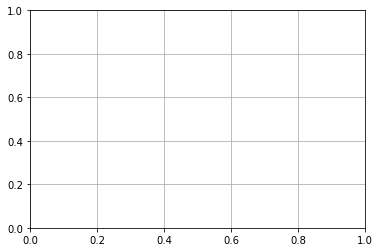

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.grid()

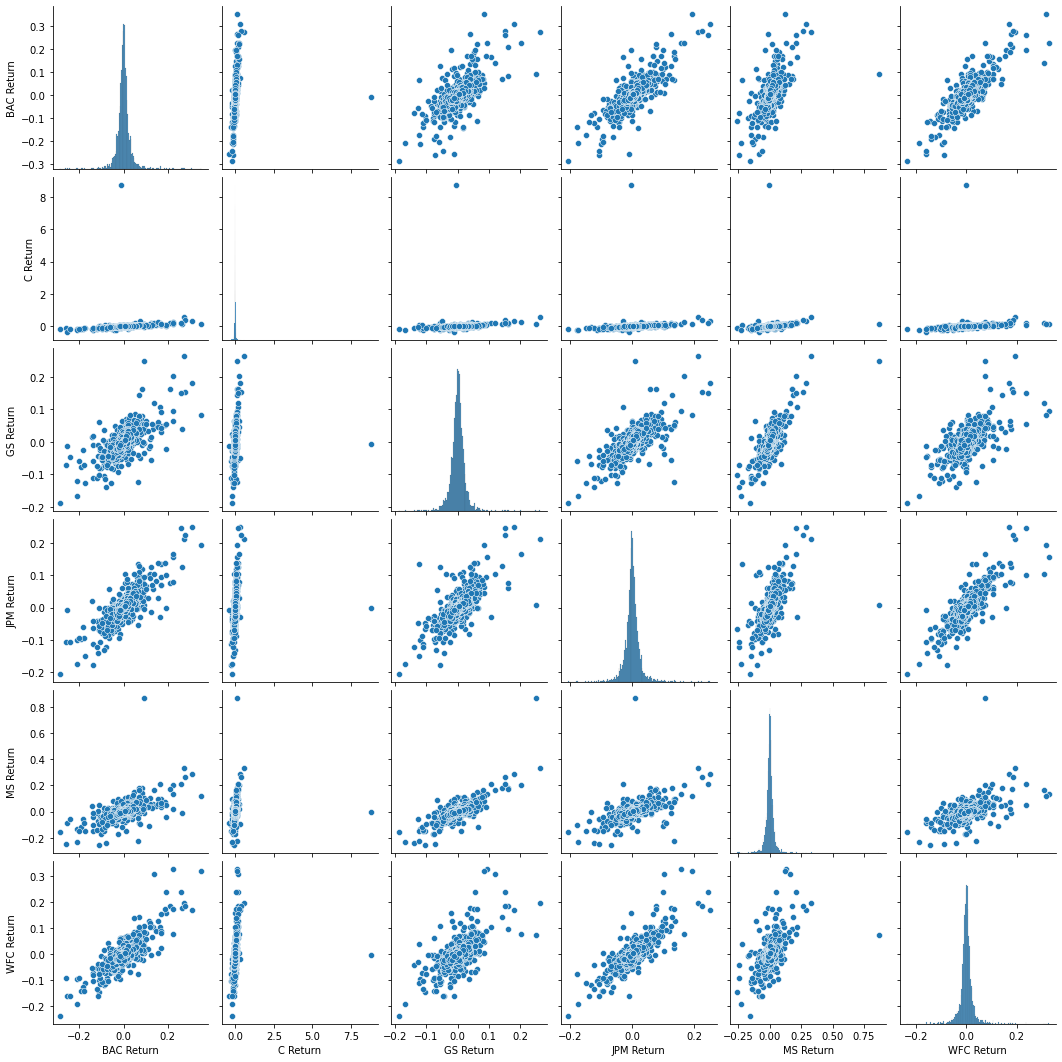

In [42]:
sns.pairplot(returns)

In [43]:
#Comments:

## 'C' Citibank stands out as it loses value over time 

In [44]:
### EDA Part 4

### exploring on what dates each bank stock had 
### the best and worst single day returns

In [45]:
returns.idxmin()

Bank Ticker
BAC Return    2009-01-20
C Return      2009-02-27
GS Return     2009-01-20
JPM Return    2009-01-20
MS Return     2008-10-09
WFC Return    2009-01-20
dtype: object

In [46]:
returns.idxmax()

Bank Ticker
BAC Return    2009-04-09
C Return      2011-05-09
GS Return     2008-11-24
JPM Return    2009-01-21
MS Return     2008-10-13
WFC Return    2008-07-16
dtype: object

In [47]:
### Results comments:

### 4 out of 6 banks had their biggest
### stock value drop on 20.01.2009 

In [48]:
### EDA Part 5

###  Take a look at the standard 
### deviation of the returns, which 
### stock would you classify as the 
### riskiest over the entire time 
### period? Which would you classify as 
### the riskiest for the year 2015?

In [49]:
returns.std()

Bank Ticker
BAC Return    0.037090
C Return      0.179118
GS Return     0.025479
JPM Return    0.027880
MS Return     0.038159
WFC Return    0.030479
dtype: float64

In [50]:
#CITI GROUP 'C'

In [51]:
returns.loc['2015-01-02':'2015-12-31'].std()

Bank Ticker
BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

In [52]:
# similar risk profile in 2015

In [53]:
### EDA Part 6 

### ** Create a distplot  
### the 2015 returns for Morgan Stanley **

In [56]:
MS2015 = returns.loc['2015-01-01':'2015-12-31','MS Return']

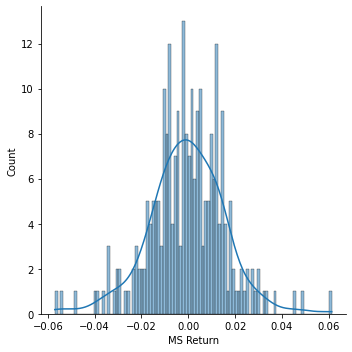

In [57]:
sns.displot(MS2015,kde=True,bins=100)

In [58]:
### EDA Part 7

### ** Create a distplot
### of the 2008 returns 
### for CitiGroup **

In [60]:
C2008 = returns.loc['2008-01-02':'2008-12-31','C Return']

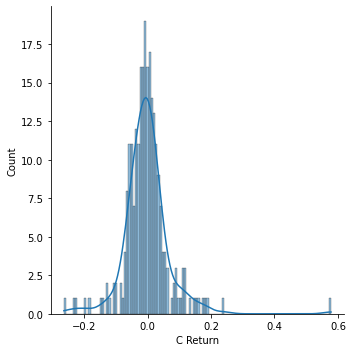

In [61]:
sns.displot(C2008, kde=True, bins=120)

In [62]:
## Result comments: significant deviation compared
## to Morgan Stanley in 2015 (10 times)

In [63]:
### EDA Part 8 

### Create a line plot showing 
### Close price for each 
###bank for the entire index of time.

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [67]:
bank_stocks.xs('close',level=1,axis=1).iplot()

In [68]:
### EDA Part 9

### Let's analyze the moving averages for 
### these stocks in the year 2008. 

### Plot the rolling 30 day average against 
### the Close Price for Bank Of America's 
### stock for the year 2008**

In [69]:
BAC_2008 = bank_stocks.loc['2008-01-01':'2008-12-31','BAC']
BAC_2008.head()

Stock Info,open,high,low,close,volume
2008-01-02,41.53,41.55,40.35,40.56,30764600
2008-01-03,40.63,40.81,40.25,40.30,22589500
2008-01-04,40.00,40.29,39.76,39.85,34921700
2008-01-07,40.05,40.24,39.26,39.90,31884400
2008-01-08,40.18,40.21,38.28,38.41,42143300


In [72]:
BAC_2008.loc[:,'30 day average'] = BAC['close'].rolling(window=30).mean()
BAC_2008[['close','30 day average']]

Stock Info,close,30 day average
2008-01-02,40.56,43.168667
2008-01-03,40.30,43.084667
2008-01-04,39.85,42.987333
2008-01-07,39.90,42.912667
2008-01-08,38.41,42.754667
...,...,...
2008-12-24,13.53,14.738667
2008-12-26,13.36,14.617333
2008-12-29,12.94,14.478667
2008-12-30,13.24,14.372667


In [75]:
BAC_2008[['close','30 day average']].iplot()

In [76]:
###EDA Part 10

### ** Create a heatmap of the 
### correlation between the stocks 
### Close Price. create a clustermap 
### to cluster the correlations together:**

In [77]:
bank_stocks_close = bank_stocks.xs('close',level=1,axis=1)
bank_stocks_close.corr()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.233048,0.659532,0.115520,0.921929,0.011058
C,0.233048,1.000000,0.455664,0.747034,0.355680,0.792548
GS,0.659532,0.455664,1.000000,0.650981,0.791205,0.499350
JPM,0.115520,0.747034,0.650981,1.000000,0.277358,0.926666
MS,0.921929,0.355680,0.791205,0.277358,1.000000,0.156651
WFC,0.011058,0.792548,0.499350,0.926666,0.156651,1.000000


<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

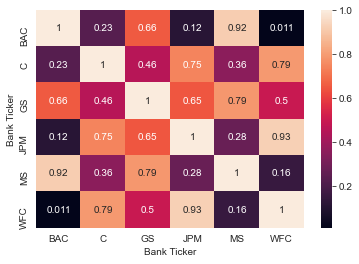

In [78]:
sns.heatmap(bank_stocks_close.corr(),annot=True)

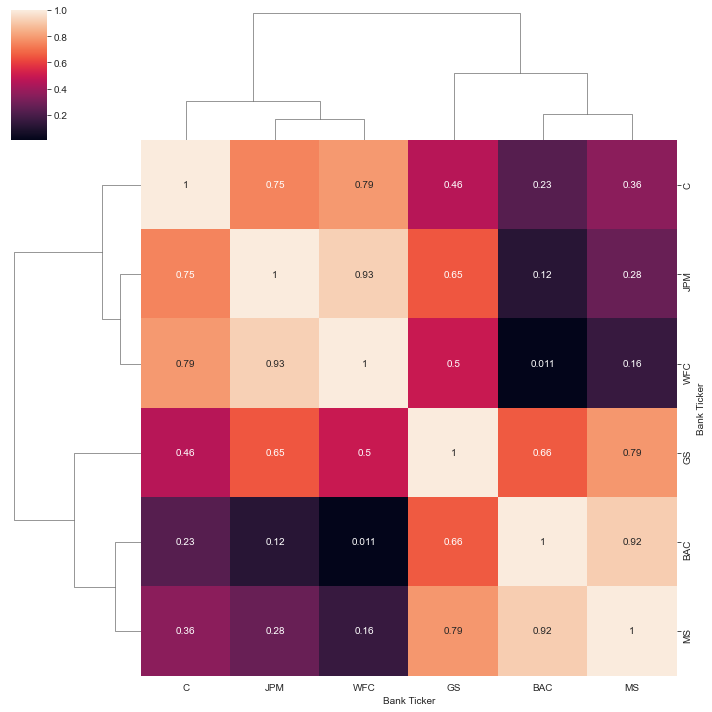

In [79]:
sns.clustermap(bank_stocks_close.corr(),annot=True)

In [81]:
## Heatmap using iplot
close_corr = bank_stocks.xs('close',level=1,axis=1).corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')


In [ ]:
### EDA Part 11

### **  create
###  a candle plot of Bank of America's stock 
### from Jan 1st 2015 to Jan 1st 2016.**

In [94]:
BAC_2015 = bank_stocks['BAC'][['open','high','low','close']]['2015-01-01':'2016-01-01']

BAC_2015.iplot(kind='candle')

In [96]:
### EDA Part 12

### create a Simple Moving Averages plot 
### of Morgan Stanley for the year 2015.**

In [101]:
MS_2015_close = bank_stocks['MS'][['close']]['2015-01-01':'2016-01-01']

In [103]:
MS_2015_close.ta_plot(study='sma',periods=[13,21,55])

In [104]:
### EDA Part 13

### create a Bollinger Band 
### Plot for Bank of America for the year 2015

In [105]:
BAC_2015_close = bank_stocks['BAC'][['close']]['2015-01-01':'2016-01-01']



In [106]:
BAC_2015_close.ta_plot(study='boll')